In [1]:
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)

In [2]:
# constants
RUN_SUMMARY_LOC = '../run_summaries/hyperparam_search'

In [3]:
all_results = pd.DataFrame()
for file_ in glob.glob(os.path.join(RUN_SUMMARY_LOC, '*.csv')):
    temp = pd.read_csv(file_)
    all_results = all_results.append(temp)

In [4]:
all_results = all_results.sort_values(['run_name', 
                                       'iteration', 
                                       'timestamp', 
                                       'accuracy_test', 
                                       'accuracy_val', 
                                       'accuracy_train'])

In [5]:
all_results['run_name'].unique()

array(['npop=104_sigma=0.96_alpha=0.1_iters=1000_type=run',
       'npop=107_sigma=0.0_alpha=0.0005_iters=1000_type=run',
       'npop=312_sigma=0.04_alpha=0.0005_iters=1000_type=run',
       'npop=34_sigma=0.12_alpha=0.5_iters=1000_type=run',
       'npop=38_sigma=0.35_alpha=0.005_iters=1000_type=run',
       'npop=48_sigma=0.04_alpha=0.01_iters=1000_type=run',
       'npop=50_sigma=0.1_alpha=0.001_iters=1000_type=run',
       'npop=56_sigma=0.63_alpha=0.5_iters=1000_type=run',
       'npop=56_sigma=1.36_alpha=0.1_iters=1000_type=run',
       'npop=56_sigma=1.77_alpha=0.1_iters=1000_type=run',
       'npop=62_sigma=0.0_alpha=0.001_iters=1000_type=run',
       'npop=65_sigma=1.01_alpha=0.0005_iters=1000_type=run',
       'npop=78_sigma=0.35_alpha=0.05_iters=1000_type=run',
       'npop=89_sigma=0.58_alpha=0.0001_iters=1000_type=run'], dtype=object)

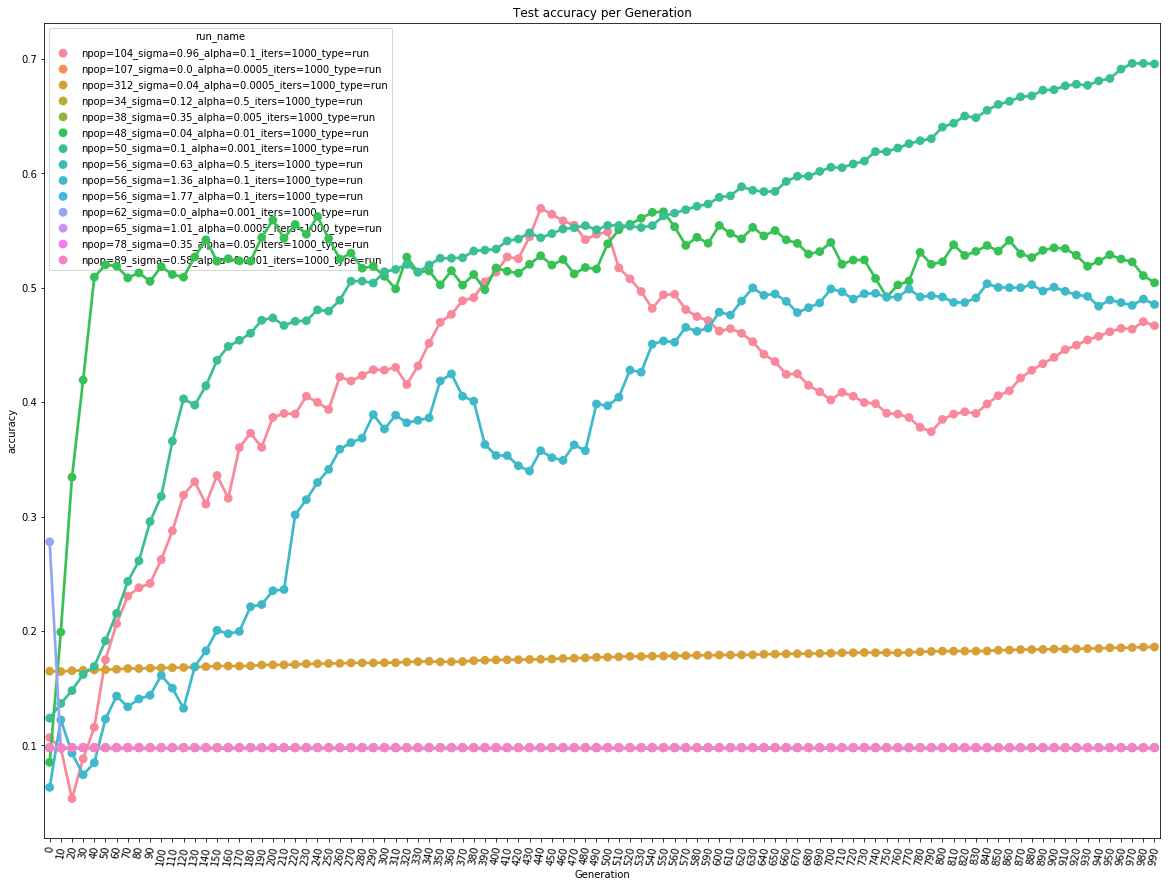

In [6]:
fig, ax = plt.subplots(figsize=(20,15))
sns.pointplot(x='iteration', y='accuracy_test', hue='run_name', data=all_results)
plt.ylabel('accuracy')
plt.title('Test accuracy per Generation')
plt.xlabel('Generation')
plt.xticks(rotation=80)
plt.show()

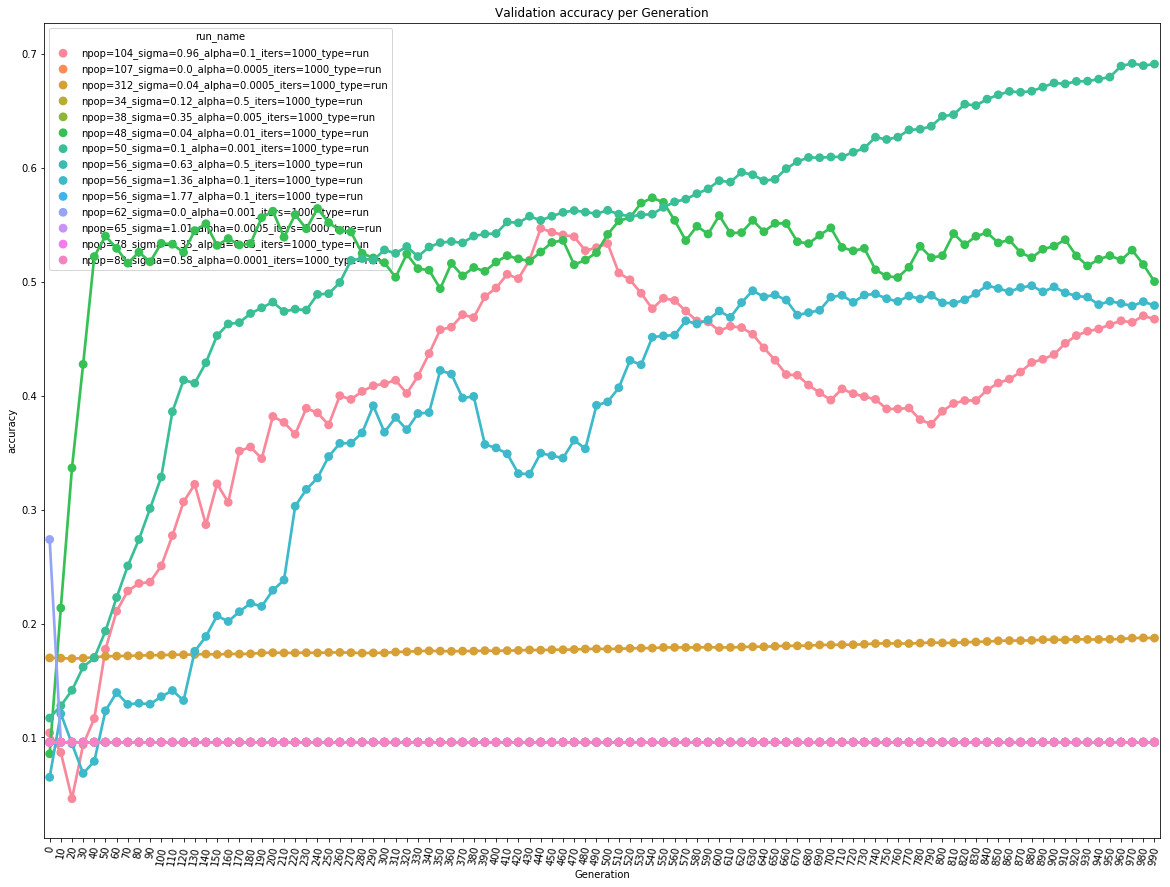

In [7]:
fig, ax = plt.subplots(figsize=(20,15))
sns.pointplot(x='iteration', y='accuracy_val', hue='run_name', data=all_results)
plt.ylabel('accuracy')
plt.title('Validation accuracy per Generation')
plt.xlabel('Generation')
plt.xticks(rotation=80)
plt.show()

In [42]:
pretty_results = all_results.loc[all_results['iteration']==990, ['run_name', 'accuracy_test', 'accuracy_val', 'accuracy_train']].sort_values(['accuracy_test'], ascending=False)
pretty_results['run_name'] = pretty_results.apply(lambda x: x['run_name'][0:-9], axis=1)
pretty_results['accuracy_test'] = pretty_results.apply(lambda x:  "{0:.2f}%".format(
    x['accuracy_test']*100), axis=1)
pretty_results['accuracy_val'] = pretty_results.apply(
    lambda x: "{0:.2f}%".format(x['accuracy_val']*100), axis=1)
pretty_results['accuracy_train'] = pretty_results.apply(
    lambda x:  "{0:.2f}%".format(x['accuracy_train']*100), axis=1)
pretty_results

,run_name,accuracy_test,accuracy_val,accuracy_train
99,npop=50_sigma=0.1_alpha=0.001_iters=1000,69.56%,69.12%,60.94%
99,npop=48_sigma=0.04_alpha=0.01_iters=1000,50.44%,50.02%,52.34%
99,npop=56_sigma=1.36_alpha=0.1_iters=1000,48.54%,47.92%,43.75%
99,npop=104_sigma=0.96_alpha=0.1_iters=1000,46.68%,46.72%,47.66%
99,npop=312_sigma=0.04_alpha=0.0005_iters=1000,18.60%,18.72%,17.19%
99,npop=107_sigma=0.0_alpha=0.0005_iters=1000,9.80%,9.58%,9.38%
99,npop=34_sigma=0.12_alpha=0.5_iters=1000,9.80%,9.58%,9.38%
99,npop=38_sigma=0.35_alpha=0.005_iters=1000,9.80%,9.58%,9.38%
99,npop=56_sigma=0.63_alpha=0.5_iters=1000,9.80%,9.58%,7.81%
99,npop=56_sigma=1.77_alpha=0.1_iters=1000,9.80%,9.58%,7.81%
